In [4]:
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [5]:
sage_walk = pd.read_csv("../experiments/results/v2/sage_walk_df.csv")

<Axes: xlabel='val_auc', ylabel='Count'>

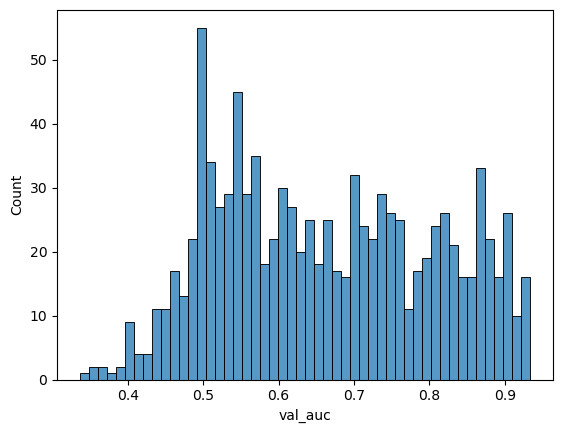

In [7]:
sns.histplot(sage_walk["val_auc"], bins=50)

In [17]:
sage_walk.head()

,weight_decay,lr,epochs,patience,delta,feature_dim,features,pre_process_layers,post_process_layers,layer_connectivity,hidden_channels,batch_norm,dropout,macro_aggregation,L2_norm,msg_passing_layers,normalize_output,aggr,val_auc,accepted
0,0.001,0.001,400,10,0.1,32,random,1,1,False,32,False,0.0,mean,True,3,False,sum,0.926,True
1,0.001,0.001,400,10,0.1,32,random,1,1,False,32,False,0.0,sum,True,3,False,sum,0.926,True
2,0.001,0.001,400,10,0.1,32,random,1,1,False,64,False,0.0,sum,True,3,False,sum,0.927,True
3,0.001,0.001,400,10,0.1,32,random,0,1,False,64,False,0.0,sum,True,3,False,sum,0.631,False
4,0.001,0.010,400,10,0.1,32,random,1,1,False,64,False,0.0,sum,True,3,False,sum,0.934,True


<Axes: xlabel='epochs', ylabel='val_auc'>

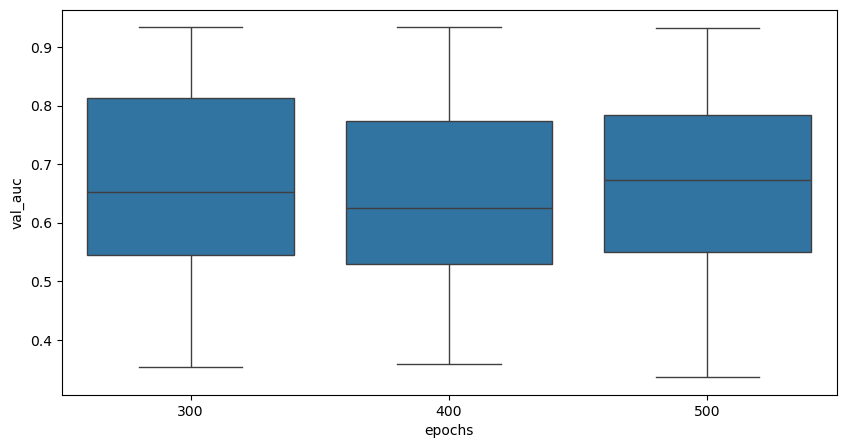

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x="epochs", y="val_auc", data=sage_walk)

In [39]:
def hp_dist(row1, row2):
    return sum(row1[col] != row2[col] for col in sage_walk.columns[:-2])

dists = []
difs = []
for i in range(sage_walk.shape[0]-1):
    row_i = sage_walk.iloc[i]
    auc_i = row_i["val_auc"]
    for j in range(i+1, sage_walk.shape[0]):
        row_j = sage_walk.iloc[j]
        auc_j = row_j["val_auc"]
        dists.append(hp_dist(row_i, row_j))
        difs.append(abs(auc_i-auc_j))

In [40]:
results_df = pd.DataFrame({
    'distance': dists,
    'auc_diff': difs
})

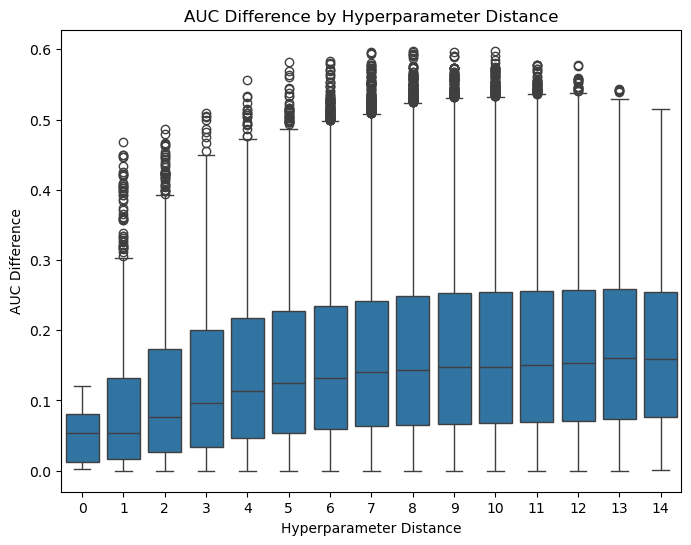

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(x='distance', y='auc_diff', data=results_df)

# Add titles and labels
plt.title('AUC Difference by Hyperparameter Distance')
plt.xlabel('Hyperparameter Distance')
plt.ylabel('AUC Difference')

# Show the plot
plt.show()